# Bspline

### Pacchetti

In [1]:
import pyBspline as Bs
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import scipy
from scipy.misc import derivative
from scipy.optimize import curve_fit
import pandas as pd
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import AppLayout, FloatSlider
from mpl_toolkits.mplot3d import Axes3D
import copy
import pandas as pd
from scipy import integrate
import itertools 
import time

[NbConvertApp] Converting notebook pyBspline.ipynb to script
[NbConvertApp] Writing 48102 bytes to pyBspline.py


In [ ]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# Dominio 1D

## Codominio 1D

### Funzioni di base

In [25]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=3 #polinomial degree
N=5 #base cardinality
xmin = 0
xmax = 1#N-P

kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

polinomial degree :  3
base caridnality  :  5
knots             :  [0.  0.  0.  0.  0.5 1.  1.  1.  1. ]


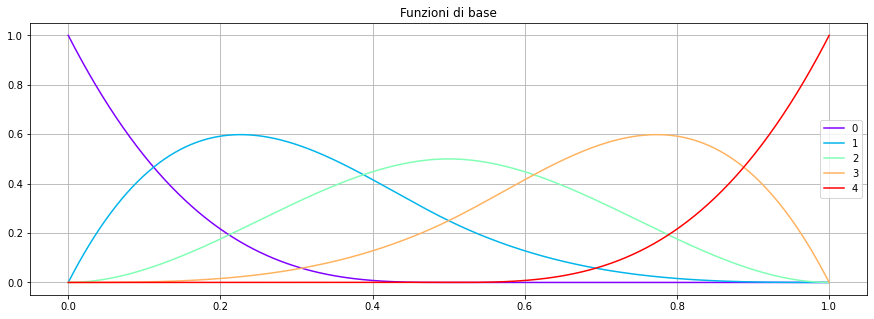

In [26]:
#grafico le funzioni di base
x = np.linspace(xmin,xmax,1000,endpoint=True)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)
    #print(bs._cp)
    
    
    y=bs.evaluate(x)
    
    plt.plot(x, y, color= next(colors),label=str(i))
    
plt.title("Funzioni di base")
plt.legend()
plt.grid(True)
plt.show()

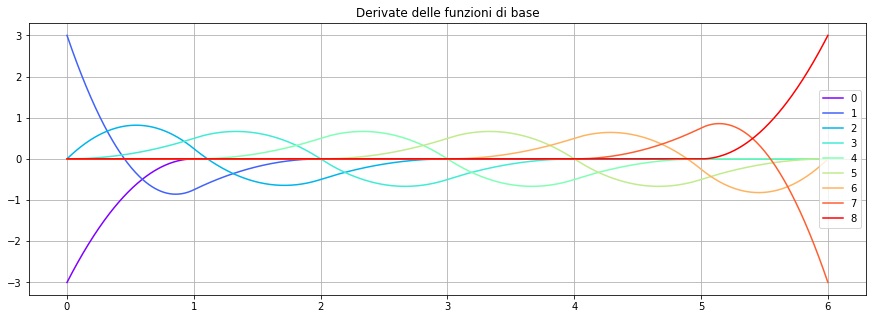

In [8]:
#grafico le funzioni derivate di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

der = bs.derivative()

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative()
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    #y_diff = derivative(f, x, dx=1e-6)
    
    c = next(colors)
    plt.plot(x, y, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.title("Derivate delle funzioni di base")
plt.legend()
plt.grid(True)
plt.show()

## Approssimazione: 1D $\rightarrow$ 1D

In [10]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=12 #base caridnality
xmin = 0.
xmax = 10.

kv =  Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

polinomial degree :  2
base caridnality  :  12
knots             :  [ 0.  0.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 10. 10.]


In [11]:
#function
def func(x):
    return np.sin(2*np.pi*x/5) #+ np.power(x,5.0)#np.full(len(x),1.0)     

#cp = bs.approximate(func)#,opts={"norm":"L1"})
#lv = bs.load_vector(func)
#om = bs.overlap_matrix()

In [12]:
#fitting_Bspline
def fitting_Bspline(x,*par):
    #bs.clear_cp()
    for i in range(len(par)):
        bs.set_cp(i,par[i])
    return bs.evaluate(x)        

In [13]:
#x,y
x = np.linspace(xmin,xmax,100,endpoint=True)
y = func(x)

In [14]:
#fit
p0 = list ( np.zeros(N))
popt,pcov = curve_fit(fitting_Bspline,x,y,p0=p0)
#print(popt)

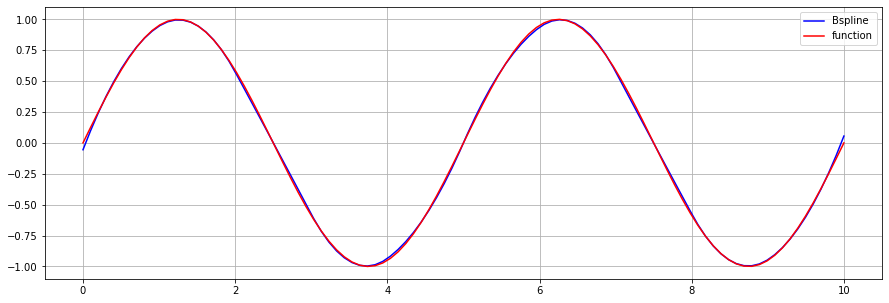

In [15]:
#grafico
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

bs.approximate(func,opts={"N":[100]})
yb = bs.evaluate(x)
yf = func(x)

for i in range(len(popt)):
    bs.set_cp(i,popt[i])
yfit = bs.evaluate(x)
    
plt.plot(x, yb  , color= "blue"  ,label="Bspline")
plt.plot(x, yf  , color= "red"   , label="function")
#plt.plot(x, yfit, color= "green" , label="fit")
    
plt.legend()
plt.grid(True)
plt.show()

## Codominio 2D

### Curva in 2D

In [7]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=22 #base caridnality
xmin = 0.0
xmax = 1.0

#
kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])


polinomial degree :  2
base caridnality  :  22
knots             :  [0.   0.   0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55
 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.   1.  ]


In [8]:
#function
def func(t):
    #print(cpz)
    a = 20
    cpx = t#np.random.rand(N)
    cpy = np.cos(a*t)/2.0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [9]:
#approximate
cp = bs.approximate(func,opts={"delta":[100]})
cpx = cp[0]
cpy = cp[1]

In [11]:
#xy
NN = 1000
t= np.linspace(xmin,xmax,NN)

#
xy   = bs.evaluate(t)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

#
xy = func(t)
df0 = pd.DataFrame(xy)
df0 = df0.rename(columns={0:"x",1:"y"})

index = 800
der = bs.derivative()
arrow = der.evaluate(t[index])

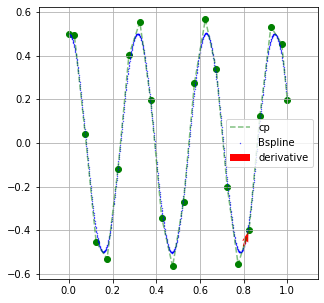

In [12]:
#grafico
plt.figure ( 0 , figsize = ( 5 , 5 ) )
   
#converto in dataframe    
plt.plot(cpx,cpy,color="green",label="cp",linestyle="--",alpha=0.5)
plt.scatter(cpx,cpy,color="green")
plt.scatter(df["x"], df["y"], color= "blue",label="Bspline",s=0.1)
#plt.scatter(df0["x"], df0["y"], color= "red",label="function",s=0.1)
plt.quiver( *list(df.iloc[index]) , *arrow ,label="derivative",color="red")
plt.legend()
plt.grid(True)
#plt.xlim(0.0,0.5)
#plt.ylim(0.0,0.5)
#aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
plt.axis('equal')
plt.show()

## Codominio 3D

### Curva in 3D

In [29]:
#definisco la dimensionaità:
sh = Bs.shape(1,3)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=22 #base caridnality
#
xmin = 0.0
xmax = 1.0

#
kv = Bs.uniform_open_kv(0,1,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

polinomial degree :  2
base caridnality  :  22
knots             :  [0.   0.   0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55
 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.   1.  ]


In [30]:
#func
def func(t):
    cpz = t#np.random.rand(N)
    #print(cpz)
    a = 20
    cpx = np.sin(a*t)#np.random.rand(N)
    cpy = np.cos(a*t)#np.random.rand(N)
    out = np.zeros(shape=(len(t),3))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
        out[i,2] = cpz[i]
    return out

In [31]:
#approximate
cp = bs.approximate(func,opts={"delta":[100]})
cpx = cp[0]
cpy = cp[1]
cpz = cp[2]
#cp

In [32]:
#xy
NN = 1000
t = np.linspace(0.,1.,NN,endpoint=False)

In [33]:
#
xyz = func(t)
df0 = pd.DataFrame(xyz)
df0 = df0.rename(columns={0:"x",1:"y",2:"z"})
df0["x0"] = t
#df0

In [34]:
#
xyz = bs.evaluate(t)
df = pd.DataFrame(xyz)
df = df.rename(columns={0:"x",1:"y",2:"z"})
#df["x0"] = t
#df
index = 100
der = bs.derivative()
arrow = der.evaluate(t[index])

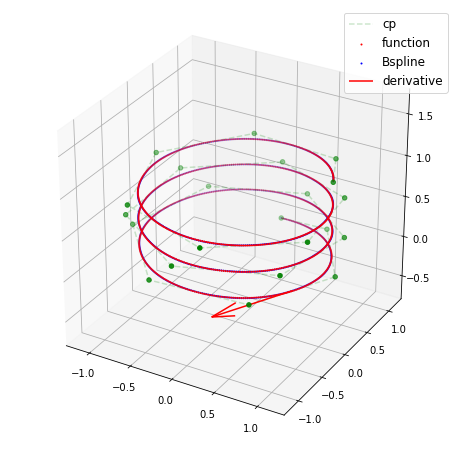

In [36]:
#grafico
fig = plt.figure ( 0 , figsize=(8,8) )    
ax = fig.gca(projection='3d')
#ax.set_aspect('equal')
#plt.plot(pyx, pyy, pyz)

#converto in dataframe    
X = [df.loc[N,"x"] ,df.loc[N,"y"] , df.loc[N,"z"]]
ax.plot(cpx,cpy,cpz,color="green",label="cp",linestyle="--",alpha=0.2)
ax.scatter(cpx,cpy,cpz,color="green",marker='o')
ax.scatter(df0["x"],df0["y"],df0["z"], color= "red",label="function",s=1)
ax.scatter(df["x"], df["y"],df["z"], color= "blue",label="Bspline",s=1)
plt.quiver( *list(df.iloc[index]) , *arrow  , \
               normalize=True,label="derivative",color="red")

plt.legend(fontsize=12)
plt.grid(True)
#plt.xlim(0.0,0.5)
#plt.ylim(0.0,0.5)
#aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
#plt.axis('equal')
set_axes_equal(ax)
plt.show()

# Dominio 2D

## Codominio 1D

### Funzioni di base in 2D

In [2]:
#definisco la dimensionaità:
sh = Bs.shape(2, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
N = 3

xmin = 0.0
xmax = 5.0

#
kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv])
#bs.show()

polinomial degree :  1
base caridnality  :  3
knots             :  [0.  0.  2.5 5.  5. ]


In [89]:
#grafico le funzioni di base
Nx = 40
Ny = 40
x = np.linspace(xmin,xmax,Nx,endpoint=False)
y = np.linspace(xmin,xmax,Ny,endpoint=False)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#XY = pd.DataFrame({"x":X.reshape((Nx*Ny,1)), "y":Y.reshape((Nx*Ny,1))})

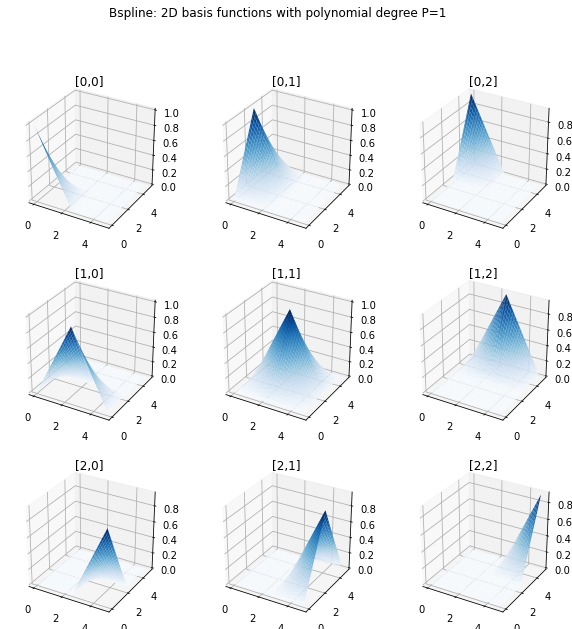

In [90]:
#%matplotlib widget

#
L  = 0#
R  = N
NP = N

#
fig = plt.figure ( 0 , figsize = ( 10 , 10 ) )
fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

treD = True

k=1
for i in range(L,R):
    for j in range(L,R):
        #print(k)
        if treD == True :
            ax = fig.add_subplot(NP, NP, k, projection='3d')
        else :
            ax = fig.add_subplot(NP, NP, k)#, projection='3d')
        k=k+1
        
        #
        bs.clear_cp()
        bs.set_cp([i,j],1.0)
        #
        z=bs.evaluate(XY) 
        Z=z.reshape(Nx,Ny)
        #        
        if treD == True :
            ax.plot_surface(X, Y, Z, cmap='Blues')
        else :
            ax.pcolormesh(X, Y, Z, cmap='Blues')#,rstride=1, cstride=1)
        
        title = "[%d,%d]"%(i,j)
        ax.set_title(title)
        #plt.axis('equal')
        #ax.set_zlim(0,1.2)
        #set_axes_equal(ax)
    
#plt.title("Funzioni di base")
#plt.legend()
#plt.grid(True)
plt.show()

### Gradiente

In [27]:
#%matplotlib widget
i = 1
j = 1

#
bs.clear_cp()
bs.set_cp([i,j],1.0)
#
z=bs.evaluate(XY) 
Z=z.reshape(Nx,Ny)
#        
der = bs.derivative()
vx = der[0].evaluate(XY)#.reshape((Nx,Ny))
vy = der[1].evaluate(XY)#.reshape((Nx,Ny))
#zd  = der.evaluate(XY)

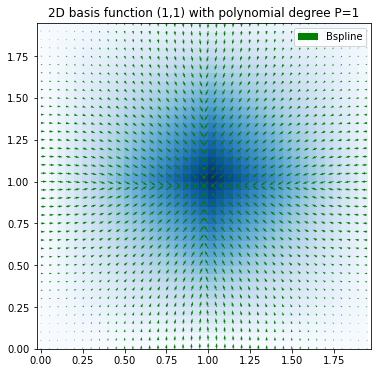

In [28]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 6 , 6 ) )

#
plt.pcolormesh(X, Y, Z, cmap='Blues',label="function")#,rstride=1, cstride=1)
#plt.quiver(X,Y,g[0],g[1],color="red",label="fd")
#plt.quiver(XY[:,0],XY[:,1],gx,gy,color="red",label="fd")
plt.quiver(XY[:,0],XY[:,1],vx,vy,color="green",label="Bspline")
plt.axis('equal')
plt.legend()
plt.title("2D basis function (%d,%d) with polynomial degree P=%d" %(i,j,P) )
plt.show()

## Codominio 3D

### Sphere

In [39]:
#definisco la dimensionaità:
sh = Bs.shape(2,3)
#sh.show()

#defiisco i knot vector

#x
Px=1 #polinomial degree
Nx=10 #base caridnality
umin = 0
umax = 2*np.pi

#y
Py=1 #polinomial degree
Ny=6 #base caridnality
vmin = 0#-1
vmax = np.pi#1

#
kvx = Bs.uniform_open_kv(umin,umax,p=Px,n=Nx)#Bs.knot_vector(Px,Nx,ux)
#kvx.show()

#
kvy = Bs.uniform_open_kv(vmin,vmax,p=Py,n=Ny)#Bs.knot_vector(Py,Ny,vy)
#kvy.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kvx,kvy])
#bs.show()

In [30]:
#sfera
def Sphere(uv):
    u = uv[:,0]
    v = uv[:,1]
    x = np.sin(v)*np.cos(u)#(1.+v/2.0*np.cos(u/2.))*np.cos(u)
    y = np.sin(v)*np.sin(u)#(1.+v/2.0*np.cos(u/2.))*np.sin(u)
    z = np.cos(v)#v/2.0*np.sin(u/2.)
    return np.asarray([x,y,z]).transpose()

In [31]:
#approximate
cp = bs.approximate(Sphere,opts={"delta":[10,5]})
cpx = cp[0]
cpy = cp[1]
cpz = cp[2]

In [32]:
#x,y
Nx = 20
Ny = 20
u = np.linspace(umin,umax,Nx,endpoint=True)
v = np.linspace(vmin,vmax,Ny,endpoint=True)
X, Y = np.meshgrid(u, v)
uv = np.zeros((Nx*Ny,2))
uv[:,0] = X.reshape((Nx*Ny,))
uv[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])
z = Sphere(uv)
XMob = z[:,0].reshape(Nx,Ny)
YMob = z[:,1].reshape(Nx,Ny)
ZMob = z[:,2].reshape(Nx,Ny)

In [33]:
#control points
#bs = set_cp(bs,popt)
zF = bs.evaluate(uv)
XFitMob = zF[:,0].reshape(Nx,Ny)
YFitMob = zF[:,1].reshape(Nx,Ny)
ZFitMob = zF[:,2].reshape(Nx,Ny)

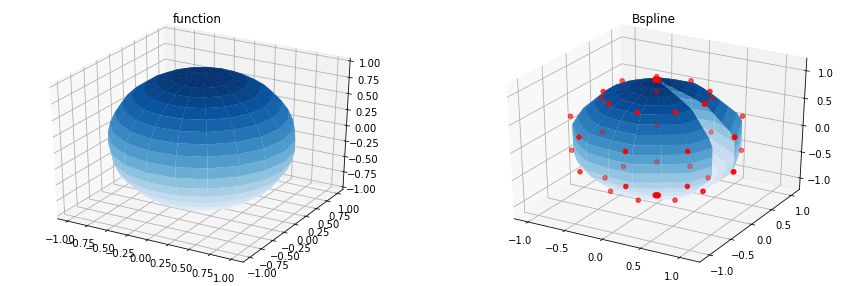

In [34]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )


ax = fig.add_subplot(121 , projection='3d')  
ax.plot_surface(XMob, YMob, ZMob, cmap='Blues')
ax.set_title("function")

ax = fig.add_subplot(122 , projection='3d')      
ax.plot_surface(XFitMob, YFitMob, ZFitMob, cmap='Blues')
#ax.plot(cpx,cpy,cpz,color="red",label="cp",linestyle="--")
ax.scatter(cpx,cpy,cpz,color="red",marker='o')
ax.set_title("Bspline")
set_axes_equal(ax)
#plt.axis('equal')
plt.show()

### Moebius

In [59]:
#definisco la dimensionaità:
sh = Bs.shape(2,3)
#sh.show()

#defiisco i knot vector

#x
Px=1 #polinomial degree
Nx=20 #base cardinality
umin = 0
umax = 2*np.pi

#y
Py=1 #polinomial degree
Ny=5 #base caridnality
vmin = -1
vmax = 1

#
kvx = Bs.uniform_open_kv(umin,umax,p=Px,n=Nx)#Bs.knot_vector(Px,Nx,ux)
#kvx.show()

#
kvy = Bs.uniform_open_kv(vmin,vmax,p=Py,n=Ny)#Bs.knot_vector(Py,Ny,vy)
#kvy.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kvx,kvy])
#bs.show()

In [60]:
#Moebius
def Moebius(uv):
    u = uv[:,0]
    v = uv[:,1]
    x = (1.+v/2.0*np.cos(u/2.))*np.cos(u)
    y = (1.+v/2.0*np.cos(u/2.))*np.sin(u)
    z = v/2.0*np.sin(u/2.)
    return np.asarray([x,y,z]).transpose()

In [61]:
#approximate
cp = bs.approximate(Moebius,opts={"delta":[10,5]})
cpx = cp[0]
cpy = cp[1]
cpz = cp[2]

In [62]:
#x,y
Nx = 20
Ny = 20
u = np.linspace(umin,umax,Nx,endpoint=True)
v = np.linspace(vmin,vmax,Ny,endpoint=True)
X, Y = np.meshgrid(u, v)
uv = np.zeros((Nx*Ny,2))
uv[:,0] = X.reshape((Nx*Ny,))
uv[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])
z = Moebius(uv)
XMob = z[:,0].reshape(Nx,Ny)
YMob = z[:,1].reshape(Nx,Ny)
ZMob = z[:,2].reshape(Nx,Ny)

In [63]:
#control points
#bs = set_cp(bs,popt)
zF = bs.evaluate(uv)
XFitMob = zF[:,0].reshape(Nx,Ny)
YFitMob = zF[:,1].reshape(Nx,Ny)
ZFitMob = zF[:,2].reshape(Nx,Ny)

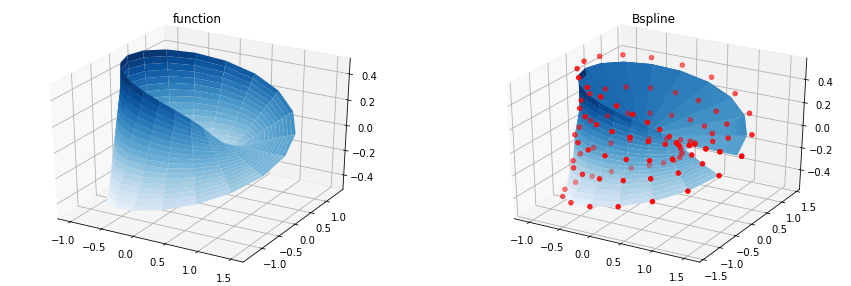

In [64]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )


ax = fig.add_subplot(121 , projection='3d')  
ax.plot_surface(XMob, YMob, ZMob, cmap='Blues')
ax.set_title("function")
#set_axes_equal(ax)

ax = fig.add_subplot(122 , projection='3d')      
ax.plot_surface(XFitMob, YFitMob, ZFitMob, cmap='Blues')
#ax.plot(cpx,cpy,cpz,color="red",label="cp",linestyle="--")
ax.scatter(cpx,cpy,cpz,color="red",marker='o')
ax.set_title("Bspline")
#set_axes_equal(ax)
#plt.axis('equal')
plt.show()

## Approssimazione: 2D $\rightarrow$  1D

In [2]:
#definisco la dimensionaità:
sh = Bs.shape(2,1)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=6 #base caridnality
xmin = 0.
xmax = 1.

kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv,kv])
#bs.show()

polinomial degree :  2
base caridnality  :  6
knots             :  [0.   0.   0.   0.25 0.5  0.75 1.   1.   1.  ]


In [3]:
#funzione
def func(xy):
    #(x, y) = xy
    return np.cos(2*np.pi*xy[:,0]) + np.sin(2*np.pi*xy[:,1]) #+ np.power(x,5.0)#np.full(len(x),1.0)     

#cp = bs.approximate(func)#,opts={"norm":"L1"})
#lv = bs.load_vector(func)
#om = bs.overlap_matrix()

In [4]:
#fitting_Bspline
il = bs.index_list()

def fitting_Bspline(xy,*par):
    #bs.clear_cp()
    #(x, y) = xy
    for i,j in zip(il,range(len(par))):
        bs.set_cp(i,par[j])
    return bs.evaluate(xy)        

In [5]:
#x,y
Nx = 20
Ny = 20
x = np.linspace(xmin,xmax,Nx,endpoint=True)
y = np.linspace(xmin,xmax,Ny,endpoint=True)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])
z = func(XY)
Z = z.reshape(Nx,Ny)

In [32]:
# fit
p0 = list ( np.zeros(N**2))
popt,pcov = curve_fit(fitting_Bspline,XY,z,p0=p0)
#print(popt)
# control points
for i,j in zip(il,range(len(popt))):
        bs.set_cp(i,popt[j])
zF = bs.evaluate(XY)
ZF=zF.reshape(Nx,Ny)

In [6]:
# approssimazione
cp = bs.approximate(func)
zB = bs.evaluate(XY)
ZB=zB.reshape(Nx,Ny)

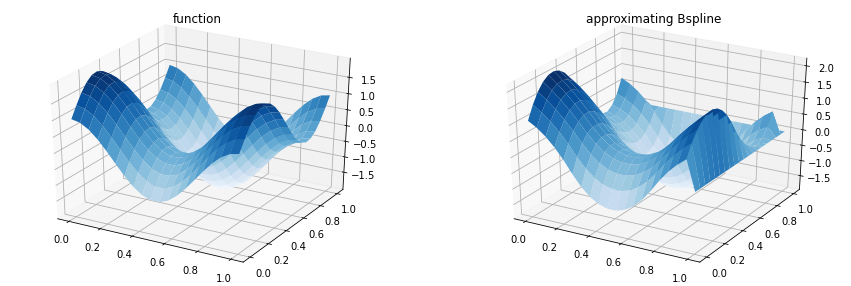

In [7]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )

ax = fig.add_subplot(121 , projection='3d')  
ax.plot_surface(X, Y, Z, cmap='Blues')
ax.set_title("function")

ax = fig.add_subplot(122 , projection='3d')      
ax.plot_surface(X, Y, ZB, cmap='Blues')
ax.set_title("approximating Bspline")
#ax.scatter(X,Y,cp,color="red",marker='o')

#ax = fig.add_subplot(133 , projection='3d')      
#ax.plot_surface(X, Y, ZF, cmap='Blues')
#ax.set_title("fit")

plt.show()

In [9]:
bs.control_points("edge")

,0
"(0, 0)",1.09191
"(1, 0)",0.781748
"(2, 0)",-1.14498
"(3, 0)",-1.14498
"(4, 0)",0.781748
"(5, 0)",1.09191
"(0, 1)",2.14573
"(5, 1)",2.14573
"(0, 2)",2.15736
"(5, 2)",2.15736


# Dominio 3D

## Codominio 1D

### Funzioni di base

In [50]:
#definisco la dimensionaità:
sh = Bs.shape(3, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
#N0 = 4
N = 3  #base caridnality
#
xmin = 0.0
xmax = 2.0

#
kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv,kv])
#bs.show()

polinomial degree :  1
base caridnality  :  3
knots             :  [0. 0. 1. 2. 2.]


In [51]:
#grafico le funzioni di base
Nx = 10
Ny = 10
Nz = 10
Nxyz  = Nx*Ny*Nz
x = np.linspace(min(v),max(v),Nx,endpoint=True)
y = np.linspace(min(v),max(v),Ny,endpoint=True)
z = np.linspace(min(v),max(v),Nz,endpoint=True)
X, Y , Z = np.meshgrid(x, y, z)
XYZ = np.zeros((Nxyz,3))
XYZ[:,0] = X.reshape((Nxyz,))
XYZ[:,1] = Y.reshape((Nxyz,))
XYZ[:,2] = Z.reshape((Nxyz,))
#XY = pd.DataFrame({"x":X.reshape((Nx*Ny,1)), "y":Y.reshape((Nx*Ny,1))})

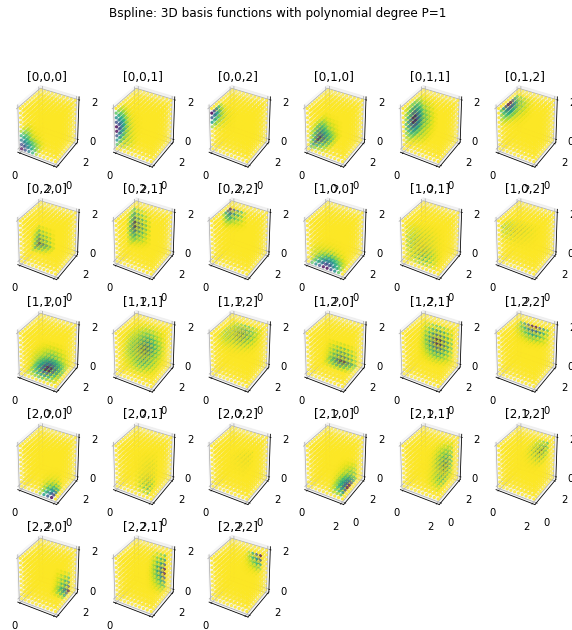

In [52]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 10 , 10 ) )
fig.suptitle("Bspline: 3D basis functions with polynomial degree P=" + str(P), fontsize=12 )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

cmap = plt.get_cmap('viridis_r')

k=1
for i in range(0,N):
    for j in range(0,N):
        for w in range(0,N):
            #print(k)
            ax = fig.add_subplot(5,6,k, projection='3d')
            k=k+1

            #
            bs.clear_cp()
            bs.set_cp([i,j,w],1.0)
            #
            t=bs.evaluate(XYZ) 
           
            #
            norm = Normalize(vmin=min(t), vmax=max(t))
            ax.scatter(XYZ[:,0],XYZ[:,1],XYZ[:,2],color=cmap(norm(t)),marker=".")
            title = "[%d,%d,%d]"%(i,j,w)
            ax.set_title(title)
            #        
            #ax.pcolormesh(X, Y, Z, cmap='Blues')#,rstride=1, cstride=1)
            #plt.axis('equal')
            #ax.set_zlim(0,1.2)
            #set_axes_equal(ax)
    
#plt.title("Funzioni di base")
#plt.legend()
#plt.grid(True)
plt.show()

### Gradiente

In [50]:
#%matplotlib widget
i = 0
j = 0
k = 0

#
bs.clear_cp()
bs.set_cp([i,j,k],1.0)
#
t=bs.evaluate(XYZ) 
Z=t.reshape(Nx,Ny,Nz)
#        
normalize = 10 
der = bs.derivative()
vx = der[0].evaluate(XYZ)/normalize#.reshape((Nx,Ny))
vy = der[1].evaluate(XYZ)/normalize#.reshape((Nx,Ny))
vz = der[2].evaluate(XYZ)/normalize#.reshape((Nx,Ny))
#zd  = der.evaluate(XY)

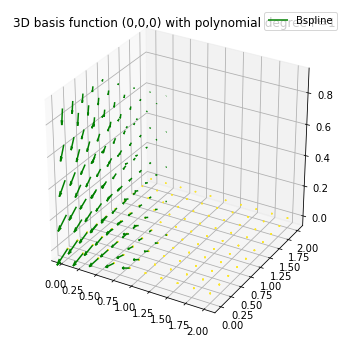

In [51]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 6 , 6 ) )
ax = fig.add_subplot(111, projection='3d')
#
t=bs.evaluate(XYZ)            
#
norm = Normalize(vmin=min(t), vmax=max(t))
plt.scatter(XYZ[:,0],XYZ[:,1],XYZ[:,2],color=cmap(norm(t)),marker=".")
plt.quiver(XYZ[:,0],XYZ[:,1],XYZ[:,2],vx,vy,vz,color="green",label="Bspline")
#ax.pcolormesh(X, Y, Z, cmap='Blues',label="function")#,rstride=1, cstride=1)
#plt.quiver(X,Y,g[0],g[1],color="red",label="fd")
#plt.quiver(XY[:,0],XY[:,1],gx,gy,color="red",label="fd")

#plt.axis('equal')
plt.legend()
plt.title("3D basis function (%d,%d,%d) with polynomial degree P=%d" %(i,j,k,P) )
plt.show()

# Galerkin Method

In [1]:
import pyBspline as Bs
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import scipy
from scipy.misc import derivative
from scipy.optimize import curve_fit
import pandas as pd
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import AppLayout, FloatSlider
from mpl_toolkits.mplot3d import Axes3D
import copy
import pandas as pd
from scipy import integrate
import itertools 
import time

[NbConvertApp] Converting notebook pyBspline.ipynb to script
[NbConvertApp] Writing 49323 bytes to pyBspline.py


In [16]:
#definisco la dimensionaità:
sh = Bs.shape(2, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
N = 5

xmin = -1.0
xmax = 1.0

#
kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv])
#bs.show()

In [17]:
#x,y
Nx = 20
Ny = 20
x = np.linspace(xmin,xmax,Nx,endpoint=True)
y = np.linspace(xmin,xmax,Ny,endpoint=True)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])

## Dominio 2D - esempio 1

In [18]:
def gD(xx): # soluzione
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = x + y 
    out = np.power(x,2) + np.power(y,2) #np.full(4,len(x))
    #out = np.cos(5*x) - np.sin(5*y)
    #out = x**2 + x*y + 4
    return out
    
def func(xx): # - Laplaciano
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    out = np.full(shape=(len(x),1),fill_value=4.0)
    #out = - 25*np.cos(5*x) + 25*np.sin(5*y)
    #out = np.full(shape=(len(x),1),fill_value=0)
    return -out

In [19]:
#Galerkin
cp = bs.Galerkin(func,gD,opts={"delta":[4,4]})
zb = bs.evaluate(XY)
ZB = zb.reshape(Nx,Ny)

In [20]:
#approximate
cp = bs.approximate(gD,opts={"delta":[4,4]})
za = bs.evaluate(XY)
ZA = za.reshape(Nx,Ny)

In [21]:
#solution
z = gD(XY)
Z = z.reshape(Nx,Ny)

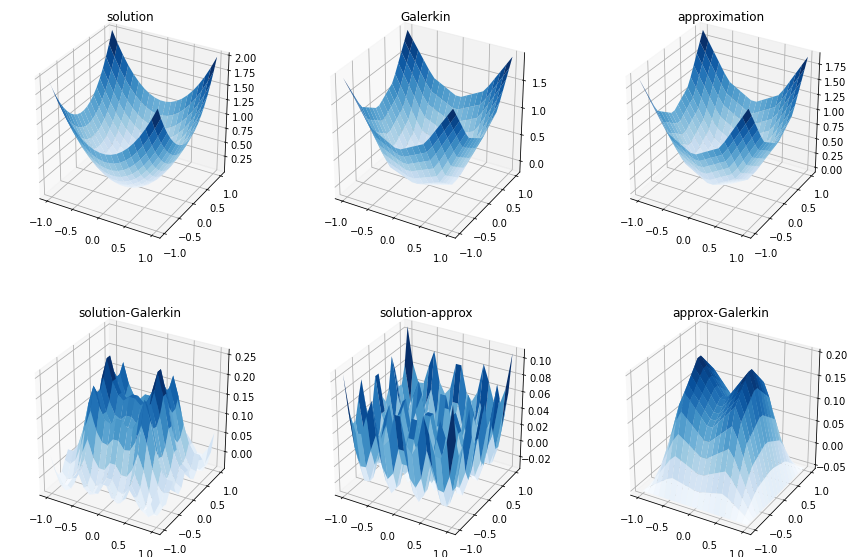

In [22]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )

###############################################

ax = fig.add_subplot(231 , projection='3d')  
ax.plot_surface(X, Y, Z, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("solution")

ax = fig.add_subplot(232 , projection='3d')      
ax.plot_surface(X, Y, ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,zedgeB,".",c="red")
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("Galerkin")

ax = fig.add_subplot(233 , projection='3d')      
ax.plot_surface(X, Y, ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approximation")

###############################################

ax = fig.add_subplot(234 , projection='3d')      
ax.plot_surface(X, Y, Z-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-Galerkin")

ax = fig.add_subplot(235 , projection='3d')      
ax.plot_surface(X, Y, Z-ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-approx")

ax = fig.add_subplot(236 , projection='3d')      
ax.plot_surface(X, Y, ZA-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approx-Galerkin")

###############################################

plt.show()

## Dominio 2D - esempio 2

In [49]:
def gD(xx): # soluzione
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = x + y 
    #out = np.power(x,2) + np.power(y,2) #np.full(4,len(x))
    out = np.cos(x) + np.cos(y)
    #out = x**2 + x*y + 4
    return out
    
def func(xx): # - Laplaciano
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = np.full(shape=(len(x),1),fill_value=4.0)
    out = - np.cos(x) - np.cos(y)
    #out = np.full(shape=(len(x),1),fill_value=0)
    return -out

In [50]:
#Galerkin
cp = bs.Galerkin(func,gD,opts={"delta":[10,10]})
zb = bs.evaluate(XY)
ZB = zb.reshape(Nx,Ny)

In [114]:
self = bs
opts = None
f = func

In [179]:
opts = self.prepare_opts(opts)

#definisco la funzione da integrare
#definisco la norma di Lebesgue

#if opts["norm"] == "L1" :
integrate = lambda *xx : left.evaluate(xx)*right.evaluate(xx)
#elif opts["norm"] == "L2" :
#    integrate = lambda *xx : np.power(left.evaluate(xx)*right.evaluate(xx),2.0)

#mi serve solo per avere una classe costrutira correttamente
#der = self.derivative()        
br = self.basis_range()

smd = list()#stifness matrix for derivatives

X = np.zeros(self.dim())
conta = 1
for k in range(0,self.dim()):
    conta = conta * opts["delta"][k]
Xintegration = np.zeros(shape=(conta,self.dim()))



if opts["print"] == True : print("preparation",end="\r")
#for k in range(0,self.dim()):

#if opts["print"] == True : print("\ndimension :",k)
#d = der[k]
#d.clear_cp()
scalar = self._scalar()
left   = scalar.copy()
right  = scalar.copy()
left.clear_cp()
right.clear_cp()

#adjacency matrix
am = self.adjacency_matrix()

smd1D = am.copy()    
smd1D[ smd1D == False ] = 0.0 #np.nan
smd1D[ smd1D == True ] = 0.0 #np.nan

#calcolo il prodotto scalare dei gradienti
n = am.shape[0]
for i in range(0,n):
    r = am.index[i] 

    #creo la funzione di base
    #left.clear_cp()
    left.set_cp(r,1.0)

    for j in range(i,n):

        c = am.columns[j]

        if am.at[r,c] is False :
            continue

        #print(i,"-",j)

        #creo la funzione di base
        #right.clear_cp()
        right.set_cp(c,1.0)
        ov = self.basis_overlap(r,c,br)

        #
        X = [ np.delete(np.linspace(ov[k][0],ov[k][1],\
                                    opts["delta"][k]+1,endpoint=False),0) \
             for k in range(0,self.dim()) ]

        area = 1
        for k in range(0,self.dim()):
            area = area * ( ov[k][1] - ov[k][0] )

        m = np.meshgrid(*X)
        for k in range(0,self.dim()):
            Xintegration[:,k] = m[k].flatten()

        #
        if opts["print"] == True : start = time.time()

        y = integrate (Xintegration)
        #print(y)
        #uso sempre L1
        #if opts["norm"] == "L1" :
        res = np.mean(y)*area
        #elif opts["norm"] == "L2" :
        #print("L2 norm")
        #res = None #np.sqrt(np.mean(y))*area

        #res = integrate.nquad( integral , ov , opts = opts)[0] #solo risultato
        if opts["print"] == True : endt = time.time()
        if opts["print"] == True : print(r,"-",c," -> ", endt - start," s")

        #    
        smd1D.at[r,c] = res
        smd1D.at[c,r] = res #matrice simmetrica

        #cancello
        right.set_cp(c,0.0)

        #cancello
    left.set_cp(r,0.0)

self._overlap_matrix = smd1D.copy()
self._ready_om = True
#smd1D

In [186]:
print(smd1D.at[(2,2),(3,2)])
print(smd1D.at[(2,2),(2,3)])

0.04
0.039999999999999994


In [177]:
r = (0,0)
c = (1,0)

left.set_cp(r,1.0)
right.set_cp(c,1.0)

ov = self.basis_overlap(r,c,br)
ov

X = [ np.delete(np.linspace(ov[k][0],ov[k][1],\
                                    opts["delta"][k]+1,endpoint=False),0) \
             for k in range(0,self.dim()) ]
X

area = 1
for k in range(0,self.dim()):
    area = area * ( ov[k][1] - ov[k][0] )

m = np.meshgrid(*X)
for k in range(0,self.dim()):
    Xintegration[:,k] = m[k].flatten()
XintegrationA = Xintegration
area

0.25

In [178]:
r = (0,0)
c = (0,1)

left.set_cp(r,1.0)
right.set_cp(c,1.0)

ov = self.basis_overlap(r,c,br)
ov

X = [ np.delete(np.linspace(ov[k][0],ov[k][1],\
                                    opts["delta"][k]+1,endpoint=False),0) \
             for k in range(0,self.dim()) ]
X

area = 1
for k in range(0,self.dim()):
    area = area * ( ov[k][1] - ov[k][0] )

m = np.meshgrid(*X)
for k in range(0,self.dim()):
    Xintegration[:,k] = m[k].flatten()
XintegrationB = Xintegration
area

0.25

In [176]:
XintegrationA == XintegrationB

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [115]:
opts = self.prepare_opts(opts)

#edge
edge = self.edge()

#stiffness matrix
sm = self.stiffness_matrix(opts) 
sm.replace(np.nan,0.0,inplace=True)

#indici dei dof interni e di bordo
index_int  = edge.index[ edge["edge"] == False ]
index_edge = edge.index[ edge["edge"] == True  ]

#degrees of freedem: internal
dof_int = sm.copy()
dof_int.drop( index_edge ,inplace = True,axis=0)
dof_int.drop( index_edge ,inplace = True,axis=1)

#degrees of freedem: edge
dof_edge = sm.copy()
dof_edge.drop( index_edge ,inplace = True,axis=0)
dof_edge.drop( index_int  ,inplace = True,axis=1)

#load vector
lv = self.load_vector(f,opts)        
lv.replace(np.nan,0.0,inplace=True)
lv.drop( index_edge  ,inplace = True)  

#convert into numpy array
dinp = np.asarray(dof_int)
denp = np.asarray(dof_edge)
#
if gD is None :
    gD = lambda xx : np.zeros(shape=(len(xx),self.codim()))

# valore di gD nei punti interpolatori
# ERRORE:
# la Bspline non è iterpolatorio solo negli angoli
# devo creare una Bspline di dimensione dim-1
# approssimare la funzione gD tramite questa Bspline
# i control points di questa diventeranno gDv
# cioè i control points di bordo della Bspline originaria
gDv = self.Dirichlet_BC(gD,opts)

#load vector
lvnp = np.asarray(lv)
#punti di bordo
gDnp = np.asarray(gDv,dtype=float)
#prodotto righe per colonne
edlv = np.dot(denp,gDnp)

#solve linear system
cpint = np.linalg.solve(dinp,lvnp-edlv) 

#preparo gli indice della variabile di output
index = self.index_list()
it = [ tuple(j) for j in index ]
out = pd.DataFrame(index=it,columns=["cp"])

#assegno ai control points i valori calcolati
#valori interni
for i in range(len(index_int)):
    j = index_int[i]
    self._cp[j] = cpint[i]
    out.iloc[out.index == j] = cpint[i]

#assegno ai control points i valori calcolati
#valori di bordo interpolanti
for i in range(len(index_edge)):
    j = index_edge[i]
    self._cp[j] = gDnp[i]
    out.iloc[out.index == j] = gDnp[i]
#
if self.codim() == 1 :
    self._cp = self._cp.astype(float)
#return out      

In [ ]:
# out non     è "simmetrico"
# cpint       è "simmetrico"
# dof_int non è "simmetrico"
# sm      non è "simmetrico"
# lv          è "simmetrico"
# gDv         è "simmetrico"

# overlap_matrix     è "simmetrico"
# adjacency_matrix   è "simmetrico"

In [125]:
print(sm.at[(3,1),(2,1)])
print(sm.at[(1,3),(1,2)])

0.8
-1.5999999999999996


In [188]:
dof_int

,"(1, 1)","(2, 1)","(3, 1)","(1, 2)","(2, 2)","(3, 2)","(1, 3)","(2, 3)","(3, 3)"
"(1, 1)",3.2,0.8,0.0,-1.6,-0.4,0.0,0.0,0.0,0.0
"(2, 1)",0.8,3.2,0.8,-0.4,-1.6,-0.4,0.0,0.0,0.0
"(3, 1)",0.0,0.8,3.2,0.0,-0.4,-1.6,0.0,0.0,0.0
"(1, 2)",-1.6,-0.4,0.0,3.2,0.8,0.0,-1.6,-0.4,0.0
"(2, 2)",-0.4,-1.6,-0.4,0.8,3.2,0.8,-0.4,-1.6,-0.4
"(3, 2)",0.0,-0.4,-1.6,0.0,0.8,3.2,0.0,-0.4,-1.6
"(1, 3)",0.0,0.0,0.0,-1.6,-0.4,0.0,3.2,0.8,0.0
"(2, 3)",0.0,0.0,0.0,-0.4,-1.6,-0.4,0.8,3.2,0.8
"(3, 3)",0.0,0.0,0.0,0.0,-0.4,-1.6,0.0,0.8,3.2


In [192]:
om = self.stiffness_matrix()
#om = self.adjacency_matrix()
#om = dof_int

In [193]:
for r in om.index :
    rr = list(r)
    r_rev = list(reversed(rr))
    rt = tuple(r_rev)
    for c in om.columns :
        cc = list(c)
        c_rev = list(reversed(cc)) 
        ct = tuple(c_rev)
        if int(om.at[r,c]*1000) != int(om.at[rt,ct]*1000) :
            print("[",r,",",c,"]=",om.at[r,c]," | rev -> ","[",rt,",",ct,"]=",om.at[rt,ct])
            #print("[",r,",",c,"]")
        #om.at[r,c]
        #om.at[rt,ct]
        

[ (0, 0) , (1, 0) ]= 0.39999999999999997  | rev ->  [ (0, 0) , (0, 1) ]= -0.6000000000000001
[ (0, 0) , (0, 1) ]= -0.6000000000000001  | rev ->  [ (0, 0) , (1, 0) ]= 0.39999999999999997
[ (1, 0) , (0, 0) ]= 0.39999999999999997  | rev ->  [ (0, 1) , (0, 0) ]= -0.6000000000000001
[ (1, 0) , (1, 0) ]= 1.5999999999999996  | rev ->  [ (0, 1) , (0, 1) ]= 1.2000000000000002
[ (1, 0) , (2, 0) ]= 0.39999999999999997  | rev ->  [ (0, 1) , (0, 2) ]= -0.6000000000000001
[ (1, 0) , (1, 1) ]= -1.5999999999999996  | rev ->  [ (0, 1) , (1, 1) ]= 0.7999999999999999
[ (2, 0) , (1, 0) ]= 0.39999999999999997  | rev ->  [ (0, 2) , (0, 1) ]= -0.6000000000000001
[ (2, 0) , (2, 0) ]= 1.5999999999999996  | rev ->  [ (0, 2) , (0, 2) ]= 1.2000000000000002
[ (2, 0) , (3, 0) ]= 0.4  | rev ->  [ (0, 2) , (0, 3) ]= -0.6000000000000001
[ (2, 0) , (2, 1) ]= -1.5999999999999996  | rev ->  [ (0, 2) , (1, 2) ]= 0.7999999999999999
[ (2, 0) , (3, 1) ]= -0.4  | rev ->  [ (0, 2) , (1, 3) ]= -0.39999999999999997
[ (3, 0) , (2

In [111]:
sm = self.stiffness_matrix()
sm.to_csv("sm.csv")

In [106]:
br = self.basis_range()
br.to_csv("br.csv")

In [108]:
am = self.adjacency_matrix()
am.to_csv("am.csv")

In [101]:
cpr = dr.control_points()
nzcpr = cpr[ cpr[0] != 0.0 ] 
nzcpr

,0
"(0, 0)",-2


In [103]:
omd[k].to_csv("omd.csv")

In [93]:
allpairs = list(itertools.product(nzcpl,nzcpr))
allpairs

[([0, 0], [0, 0])]

In [87]:
#out.at[(0,1),(1,1)]# == 
out.at[(1,0),(1,1)]

-1.5999999999999996

In [73]:
#b = bs.overlap_matrix()
#b.to_csv("overlap.csv")
b.at[(0,1),(1,1)]#== 
#b.at[(1,0),(1,1)]

0.039999999999999994

In [46]:
#approximate
cp = bs.approximate(gD,opts={"delta":[4,4]})
za = bs.evaluate(XY)
ZA = za.reshape(Nx,Ny)

In [47]:
#solution
z = gD(XY)
Z = z.reshape(Nx,Ny)

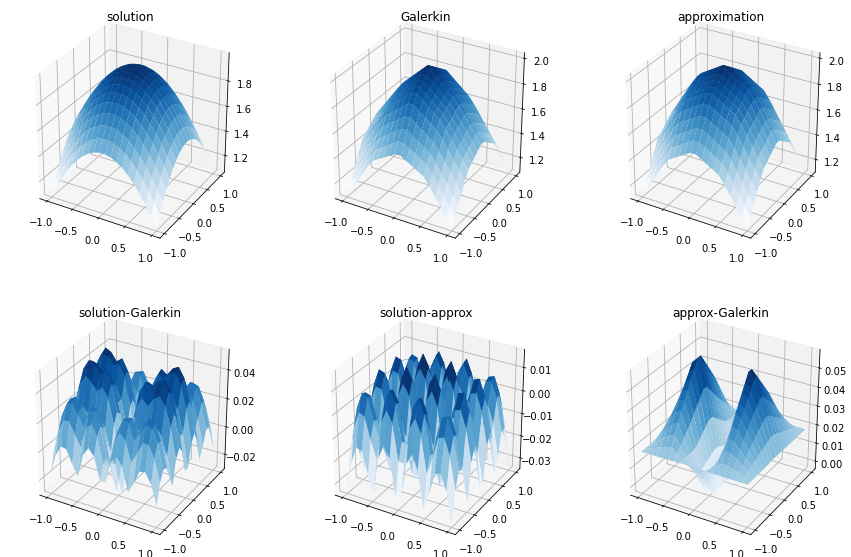

In [48]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )

###############################################

ax = fig.add_subplot(231 , projection='3d')  
ax.plot_surface(X, Y, Z, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("solution")

ax = fig.add_subplot(232 , projection='3d')      
ax.plot_surface(X, Y, ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,zedgeB,".",c="red")
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("Galerkin")

ax = fig.add_subplot(233 , projection='3d')      
ax.plot_surface(X, Y, ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approximation")

###############################################

ax = fig.add_subplot(234 , projection='3d')      
ax.plot_surface(X, Y, Z-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-Galerkin")

ax = fig.add_subplot(235 , projection='3d')      
ax.plot_surface(X, Y, Z-ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-approx")

ax = fig.add_subplot(236 , projection='3d')      
ax.plot_surface(X, Y, ZA-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approx-Galerkin")

###############################################

plt.show()

## Dominio 2D - esempio 3

In [29]:
def gD(xx): # soluzione
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = x + y 
    #out = np.power(x,2) + np.power(y,2) #np.full(4,len(x))
    #out = np.cos(5*x) - np.sin(5*y)
    out = x**2 + y**2 + x*y + 4
    return out
    
def func(xx): # - Laplaciano
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = np.full(shape=(len(x),1),fill_value=4.0)
    #out = - 25*np.cos(5*x) + 25*np.sin(5*y)
    out = np.full(shape=(len(x),1),fill_value=4)
    return -out

In [30]:
#Galerkin
cp = bs.Galerkin(func,gD,opts={"delta":[10,10]})
zb = bs.evaluate(XY)
ZB = zb.reshape(Nx,Ny)

In [31]:
#approximate
cp = bs.approximate(gD,opts={"delta":[4,4]})
za = bs.evaluate(XY)
ZA = za.reshape(Nx,Ny)

In [32]:
#solution
z = gD(XY)
Z = z.reshape(Nx,Ny)

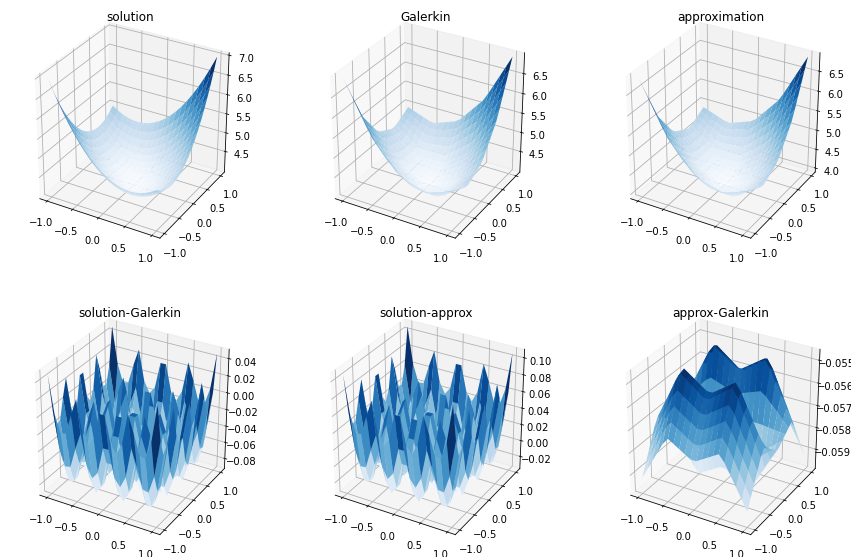

In [33]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )

ax = fig.add_subplot(231 , projection='3d')  
ax.plot_surface(X, Y, Z, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("solution")

ax = fig.add_subplot(232 , projection='3d')      
ax.plot_surface(X, Y, ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,zedgeB,".",c="red")
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("Galerkin")

ax = fig.add_subplot(233 , projection='3d')      
ax.plot_surface(X, Y, ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approximation")

###############################################

ax = fig.add_subplot(234 , projection='3d')      
ax.plot_surface(X, Y, Z-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-Galerkin")

ax = fig.add_subplot(235 , projection='3d')      
ax.plot_surface(X, Y, Z-ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-approx")

ax = fig.add_subplot(236 , projection='3d')      
ax.plot_surface(X, Y, ZA-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approx-Galerkin")

plt.show()